In [2]:
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [3]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
import seaborn as sns 

from time import sleep
from datetime import datetime

###

proj_path = 'drive/MyDrive/6.871 Project Team Folder/'
personal_path = proj_path + 'Eileen Data/'
joseph_path = proj_path + 'Joseph Gene Expression Data/'
sina_path = proj_path + 'Sina Data/'

Could be useful? https://www.researchgate.net/publication/277553709_SVD_based_Gene_Selection_Algorithm

# Load in Data

## Rna processing: 
- drop columns ending with '.1'. as normal tissue expression
- all exist without .1, strongly suggesting this is in fact normal tissue

['TCGA-CV-6933.1', 'TCGA-CV-6934.1', 'TCGA-CV-6935.1', 'TCGA-CV-6936.1',
       'TCGA-CV-6938.1', 'TCGA-CV-6939.1', 'TCGA-CV-6943.1', 'TCGA-CV-6955.1',
       'TCGA-CV-6956.1', 'TCGA-CV-6959.1', 'TCGA-CV-6960.1', 'TCGA-CV-6961.1',
       'TCGA-CV-6962.1', 'TCGA-CV-7091.1', 'TCGA-CV-7097.1', 'TCGA-CV-7101.1',
       'TCGA-CV-7103.1', 'TCGA-CV-7177.1', 'TCGA-CV-7178.1', 'TCGA-CV-7183.1',
       'TCGA-CV-7235.1', 'TCGA-CV-7238.1', 'TCGA-CV-7242.1', 'TCGA-CV-7245.1',
       'TCGA-CV-7250.1', 'TCGA-CV-7252.1', 'TCGA-CV-7255.1', 'TCGA-CV-7261.1',
       'TCGA-CV-7406.1', 'TCGA-CV-7416.1', 'TCGA-CV-7423.1', 'TCGA-CV-7424.1',
       'TCGA-CV-7425.1', 'TCGA-CV-7432.1', 'TCGA-CV-7434.1', 'TCGA-CV-7437.1',
       'TCGA-CV-7438.1', 'TCGA-CV-7440.1', 'TCGA-H7-A6C4.1', 'TCGA-HD-8635.1',
       'TCGA-HD-A6HZ.1', 'TCGA-HD-A6I0.1', 'TCGA-KU-A6H7.1', 'TCGA-UF-A71A.1',
       'TCGA-WA-A7GZ.1']
       
- split into hugo and enterez 

note: 
hugo SLC35E2 has two enterez gene ids 

In [ ]:
rna_path = Path(proj_path + '/normalized-rna-data.xlsx')
rna_df = pd.read_excel(rna_path)
#get id and cast to int 
rna_df['entrez_gene_id_rna'] = rna_df['Gene'].apply(lambda x: int(x.split("|",1)[1] ))
#get hugo 
rna_df['hugo'] = rna_df['Gene'].apply(lambda x: x.split("|",1)[0] )
rna_df.head()

,Gene,TCGA-4P-AA8J,TCGA-BA-4074,TCGA-BA-4075,TCGA-BA-4076,TCGA-BA-4077,TCGA-BA-4078,TCGA-BA-5149,TCGA-BA-5151,TCGA-BA-5152,TCGA-BA-5153,TCGA-BA-5555,TCGA-BA-5556,TCGA-BA-5557,TCGA-BA-5558,TCGA-BA-5559,TCGA-BA-6868,TCGA-BA-6869,TCGA-BA-6870,TCGA-BA-6871,TCGA-BA-6872,TCGA-BA-6873,TCGA-BA-7269,TCGA-BA-A4IF,TCGA-BA-A4IG,TCGA-BA-A4IH,TCGA-BA-A4II,TCGA-BA-A6D8,TCGA-BA-A6DA,TCGA-BA-A6DB,TCGA-BA-A6DD,TCGA-BA-A6DE,TCGA-BA-A6DG,TCGA-BA-A6DI,TCGA-BA-A6DJ,TCGA-BA-A6DL,TCGA-BA-A8YP,TCGA-BB-4217,TCGA-BB-4223,TCGA-BB-4224,...,TCGA-QK-A8ZA,TCGA-QK-A8ZB,TCGA-QK-AA3J,TCGA-QK-AA3K,TCGA-RS-A6TO,TCGA-RS-A6TP,TCGA-T2-A6WX,TCGA-T2-A6WZ,TCGA-T2-A6X0,TCGA-T2-A6X2,TCGA-T3-A92M,TCGA-T3-A92N,TCGA-TN-A7HI,TCGA-TN-A7HJ,TCGA-TN-A7HL,TCGA-UF-A718,TCGA-UF-A719,TCGA-UF-A71A,TCGA-UF-A71A.1,TCGA-UF-A71B,TCGA-UF-A71D,TCGA-UF-A71E,TCGA-UF-A7J9,TCGA-UF-A7JA,TCGA-UF-A7JC,TCGA-UF-A7JD,TCGA-UF-A7JF,TCGA-UF-A7JH,TCGA-UF-A7JJ,TCGA-UF-A7JK,TCGA-UF-A7JO,TCGA-UF-A7JS,TCGA-UF-A7JT,TCGA-UF-A7JV,TCGA-UP-A6WW,TCGA-WA-A7GZ,TCGA-WA-A7GZ.1,TCGA-WA-A7H4,entrez_gene_id_rna,hugo
0,?|100133144,-2.668367,-0.902774,-0.875868,-0.788130,-0.720443,0.305505,-1.884686,-2.273196,-1.028562,-2.359103,-2.267961,-1.734984,-2.292535,-2.034867,-1.445529,-1.107918,-2.693288,-4.924138,-0.598996,-2.701728,-1.693326,-1.028824,-1.126058,-0.177138,0.555868,-4.038260,-0.418175,-0.350013,-3.113069,-1.636349,-1.669245,-1.396426,-0.250961,-0.698789,-1.235164,-1.715348,-2.172558,0.692689,-0.759041,...,-1.226739,0.080303,0.097108,-2.735148,-0.282547,0.766106,-0.510861,0.365926,-0.063281,-0.349853,-1.191962,-1.413758,-2.039966,0.450061,-2.250369,-0.576201,-0.892550,0.412633,-0.375885,-0.002416,0.012172,-0.885552,0.107522,0.186019,0.248591,-0.595343,-1.099779,-0.509501,-1.487508,0.784834,-1.195505,-2.153869,-2.552769,-2.570372,-0.957308,1.103520,1.055458,0.110682,100133144,?
1,?|100134869,-0.794596,-1.020686,-2.464098,-2.221278,-0.817997,-0.380211,-1.300005,-2.467344,-2.103687,-1.200386,-2.639825,-1.386775,-1.542003,-0.099920,-1.203517,-0.184573,-2.223283,-1.524609,0.511413,-1.497810,-0.519020,-2.926866,0.069059,-0.617449,0.294437,-1.599741,-1.268774,-2.703403,-1.258081,-1.987165,-2.019275,-4.073444,-0.064970,-1.485542,-1.667472,-0.351495,-1.863715,0.325171,-1.096923,...,-0.589878,0.244041,0.619169,-1.347078,-1.228849,1.150059,-0.165324,-1.335510,1.230945,0.076515,-0.698765,-0.998200,-1.801836,0.926873,-1.446833,-0.321043,-0.846905,1.036154,-0.526208,-0.385914,-1.147425,-0.536055,0.258005,0.332227,0.173918,-1.749557,-0.305143,-1.010059,-0.272792,0.844650,-1.583013,-2.747920,-3.398868,-0.710990,-0.290401,1.118641,0.730860,0.065397,100134869,?
2,?|10357,2.411792,3.752946,3.888404,3.634904,3.915315,3.313590,3.563117,2.727658,2.735800,3.036732,2.753468,2.934567,2.452501,3.283812,3.655104,3.285483,1.962820,2.940204,3.198316,2.351329,3.338756,1.387340,4.097065,3.339682,3.665524,2.800231,1.799342,0.556048,2.536214,2.694082,2.321353,2.114732,2.570874,2.725813,2.521753,3.613625,4.021507,3.273238,3.727679,...,3.203928,1.798339,3.225687,2.533997,0.494128,3.026564,2.555471,1.452136,2.279025,2.184747,3.471884,3.265413,2.644048,2.297885,2.424818,1.051801,2.293206,4.051905,3.576949,2.762821,1.628951,2.265648,2.014319,2.358678,1.522075,2.625551,2.010490,2.429561,1.744007,2.406473,3.157449,-0.420827,2.519974,2.545822,2.312506,1.767151,2.989047,2.724889,10357,?
3,?|10431,5.945483,6.270801,5.988357,5.749688,5.322637,5.071589,5.728863,6.196538,5.694105,5.245816,4.967065,5.191896,4.908296,5.308824,5.207073,5.195706,5.975070,5.399957,5.708008,5.480605,5.582467,6.821470,6.130176,5.893784,5.690444,5.834212,6.357782,5.306547,5.648564,6.023422,6.712605,5.167052,5.104636,5.603932,6.236621,4.851152,5.798102,5.261801,6.403219,...,5.685049,5.487995,5.533157,5.522161,5.838139,5.418221,5.614866,6.652706,5.481120,5.563760,5.564250,5.871047,6.304907,5.586194,5.982780,4.730400,5.587638,5.466640,5.384323,5.269697,6.112797,5.679450,5.477513,5.304144,6.047472,5.436376,5.963395,5.358525,4.973021,5.648660,5.790883,5.388906,6.208256,5.519225,5.984255,

In [ ]:
drop_col = rna_df.columns[rna_df.columns.str.endswith('.1')]
"""
drop_col = ['TCGA-CV-6933.1', 'TCGA-CV-6934.1', 'TCGA-CV-6935.1', 'TCGA-CV-6936.1', 'TCGA-CV-6938.1', 
            'TCGA-CV-6939.1', 'TCGA-CV-6943.1', 'TCGA-CV-6955.1', 'TCGA-CV-6956.1', 'TCGA-CV-6959.1', 
            'TCGA-CV-6960.1', 'TCGA-CV-6961.1', 'TCGA-CV-6962.1', 'TCGA-CV-7091.1', 'TCGA-CV-7097.1', 
            'TCGA-CV-7101.1', 'TCGA-CV-7103.1', 'TCGA-CV-7177.1', 'TCGA-CV-7178.1', 'TCGA-CV-7183.1', 
            'TCGA-CV-7235.1', 'TCGA-CV-7238.1', 'TCGA-CV-7242.1', 'TCGA-CV-7245.1', 'TCGA-CV-7250.1', 
            'TCGA-CV-7252.1', 'TCGA-CV-7255.1', 'TCGA-CV-7261.1', 'TCGA-CV-7406.1', 'TCGA-CV-7416.1', 
            'TCGA-CV-7423.1', 'TCGA-CV-7424.1', 'TCGA-CV-7425.1', 'TCGA-CV-7432.1', 'TCGA-CV-7434.1', 
            'TCGA-CV-7437.1', 'TCGA-CV-7438.1', 'TCGA-CV-7440.1', 'TCGA-H7-A6C4.1', 'TCGA-HD-8635.1', 
            'TCGA-HD-A6HZ.1', 'TCGA-HD-A6I0.1', 'TCGA-KU-A6H7.1', 'TCGA-UF-A71A.1', 'TCGA-WA-A7GZ.1']
"""
rna_df = rna_df.drop(columns=drop_col)
rna_df.to_csv(personal_path+'rna-data-tumor-only.csv', index=False)

In [ ]:
drop_col

Index(['TCGA-CV-6933.1', 'TCGA-CV-6934.1', 'TCGA-CV-6935.1', 'TCGA-CV-6936.1',
       'TCGA-CV-6938.1', 'TCGA-CV-6939.1', 'TCGA-CV-6943.1', 'TCGA-CV-6955.1',
       'TCGA-CV-6956.1', 'TCGA-CV-6959.1', 'TCGA-CV-6960.1', 'TCGA-CV-6961.1',
       'TCGA-CV-6962.1', 'TCGA-CV-7091.1', 'TCGA-CV-7097.1', 'TCGA-CV-7101.1',
       'TCGA-CV-7103.1', 'TCGA-CV-7177.1', 'TCGA-CV-7178.1', 'TCGA-CV-7183.1',
       'TCGA-CV-7235.1', 'TCGA-CV-7238.1', 'TCGA-CV-7242.1', 'TCGA-CV-7245.1',
       'TCGA-CV-7250.1', 'TCGA-CV-7252.1', 'TCGA-CV-7255.1', 'TCGA-CV-7261.1',
       'TCGA-CV-7406.1', 'TCGA-CV-7416.1', 'TCGA-CV-7423.1', 'TCGA-CV-7424.1',
       'TCGA-CV-7425.1', 'TCGA-CV-7432.1', 'TCGA-CV-7434.1', 'TCGA-CV-7437.1',
       'TCGA-CV-7438.1', 'TCGA-CV-7440.1', 'TCGA-H7-A6C4.1', 'TCGA-HD-8635.1',
       'TCGA-HD-A6HZ.1', 'TCGA-HD-A6I0.1', 'TCGA-KU-A6H7.1', 'TCGA-UF-A71A.1',
       'TCGA-WA-A7GZ.1'],
      dtype='object')

In [ ]:
rna_df['hugo'].value_counts()

?          14
SLC35E2     2
CSTF2T      1
ANKFY1      1
A2BP1       1
           ..
NUPL2       1
POC1A       1
LPPR3       1
NANS        1
CCDC96      1
Name: hugo, Length: 17705, dtype: int64

In [ ]:
rna_df[rna_df.hugo == 'SLC35E2']

,Gene,TCGA-4P-AA8J,TCGA-BA-4074,TCGA-BA-4075,TCGA-BA-4076,TCGA-BA-4077,TCGA-BA-4078,TCGA-BA-5149,TCGA-BA-5151,TCGA-BA-5152,TCGA-BA-5153,TCGA-BA-5555,TCGA-BA-5556,TCGA-BA-5557,TCGA-BA-5558,TCGA-BA-5559,TCGA-BA-6868,TCGA-BA-6869,TCGA-BA-6870,TCGA-BA-6871,TCGA-BA-6872,TCGA-BA-6873,TCGA-BA-7269,TCGA-BA-A4IF,TCGA-BA-A4IG,TCGA-BA-A4IH,TCGA-BA-A4II,TCGA-BA-A6D8,TCGA-BA-A6DA,TCGA-BA-A6DB,TCGA-BA-A6DD,TCGA-BA-A6DE,TCGA-BA-A6DG,TCGA-BA-A6DI,TCGA-BA-A6DJ,TCGA-BA-A6DL,TCGA-BA-A8YP,TCGA-BB-4217,TCGA-BB-4223,TCGA-BB-4224,...,TCGA-QK-A8Z8,TCGA-QK-A8Z9,TCGA-QK-A8ZA,TCGA-QK-A8ZB,TCGA-QK-AA3J,TCGA-QK-AA3K,TCGA-RS-A6TO,TCGA-RS-A6TP,TCGA-T2-A6WX,TCGA-T2-A6WZ,TCGA-T2-A6X0,TCGA-T2-A6X2,TCGA-T3-A92M,TCGA-T3-A92N,TCGA-TN-A7HI,TCGA-TN-A7HJ,TCGA-TN-A7HL,TCGA-UF-A718,TCGA-UF-A719,TCGA-UF-A71A,TCGA-UF-A71B,TCGA-UF-A71D,TCGA-UF-A71E,TCGA-UF-A7J9,TCGA-UF-A7JA,TCGA-UF-A7JC,TCGA-UF-A7JD,TCGA-UF-A7JF,TCGA-UF-A7JH,TCGA-UF-A7JJ,TCGA-UF-A7JK,TCGA-UF-A7JO,TCGA-UF-A7JS,TCGA-UF-A7JT,TCGA-UF-A7JV,TCGA-UP-A6WW,TCGA-WA-A7GZ,TCGA-WA-A7H4,entrez_gene_id_rna,hugo
14163,SLC35E2|728661,5.241233,3.846645,3.901817,4.987901,4.702728,6.047337,4.721969,4.618828,5.232101,6.224921,5.486266,5.371979,3.555837,4.755526,6.551588,5.491078,5.349788,5.485307,6.123770,4.725652,5.441114,3.938410,5.249831,5.132481,6.720515,4.765253,4.737573,3.393857,5.399309,4.341726,6.355925,6.263198,5.184375,5.236951,4.730070,6.088576,5.929929,6.444252,6.097549,...,6.309023,6.573651,5.055689,5.780748,5.832086,5.337979,4.247440,5.737474,5.426111,4.693942,5.169354,4.531153,5.825325,5.604747,5.182378,5.314826,5.362217,6.427153,5.511836,4.607409,5.516374,4.234535,4.350970,5.427126,6.284694,3.845236,5.200164,4.515503,4.656890,5.690758,4.685115,5.320407,3.396311,4.676899,5.189565,5.952724,5.927838,6.642117,728661,SLC35E2
14164,SLC35E2|9906,-0.436708,-1.351827,-1.555165,0.011300,1.037416,1.328183,0.004763,0.346313,-0.677779,2.702220,0.187364,0.376106,-1.966738,0.045680,2.184910,0.300928,0.769776,-0.531541,1.120677,-0.065327,1.113959,-2.922731,0.635492,0.136257,1.718332,-0.124109,-0.781674,-1.961949,-0.489495,-2.558052,0.991179,-0.008228,-0.358159,-0.607218,-0.677343,0.822778,0.460017,1.991605,-0.696878,...,1.170268,0.602073,0.569843,0.488842,0.190287,-0.102377,-0.341781,0.841482,0.179257,-0.403855,0.815213,0.339695,1.155634,0.343036,-1.045973,-0.041874,-1.224915,1.025314,0.649531,-2.803079,0.328735,-1.924681,-1.178736,-0.544892,1.262384,-0.184803,-0.556810,-1.041975,-0.349531,0.111729,-0.180920,0.084864,-1.033750,-0.387115,0.689620,-0.387517,1.059738,1.900768,9906,SLC35E2


## Methylation data processing 

drop data ending with '-06' instead of '-01' as normal tissue 

['TCGA-KU-A6H7-06', 'TCGA-UF-A71A-06']

In [14]:
methyl_path = sina_path + 'methylation.txt'
methyl_df = pd.read_csv(methyl_path, sep='\t')
methyl_df.head() 

,Hugo_Symbol,Entrez_Gene_Id,TCGA-4P-AA8J-01,TCGA-BA-4074-01,TCGA-BA-4075-01,TCGA-BA-4076-01,TCGA-BA-4077-01,TCGA-BA-4078-01,TCGA-BA-5149-01,TCGA-BA-5151-01,TCGA-BA-5152-01,TCGA-BA-5153-01,TCGA-BA-5555-01,TCGA-BA-5556-01,TCGA-BA-5557-01,TCGA-BA-5558-01,TCGA-BA-5559-01,TCGA-BA-6868-01,TCGA-BA-6869-01,TCGA-BA-6870-01,TCGA-BA-6871-01,TCGA-BA-6872-01,TCGA-BA-6873-01,TCGA-BA-7269-01,TCGA-BA-A4IF-01,TCGA-BA-A4IG-01,TCGA-BA-A4IH-01,TCGA-BA-A4II-01,TCGA-BA-A6D8-01,TCGA-BA-A6DA-01,TCGA-BA-A6DB-01,TCGA-BA-A6DD-01,TCGA-BA-A6DE-01,TCGA-BA-A6DF-01,TCGA-BA-A6DG-01,TCGA-BA-A6DI-01,TCGA-BA-A6DJ-01,TCGA-BA-A6DL-01,TCGA-BA-A8YP-01,TCGA-BB-4217-01,...,TCGA-QK-A8Z7-01,TCGA-QK-A8Z8-01,TCGA-QK-A8Z9-01,TCGA-QK-A8ZA-01,TCGA-QK-A8ZB-01,TCGA-QK-AA3J-01,TCGA-QK-AA3K-01,TCGA-RS-A6TO-01,TCGA-RS-A6TP-01,TCGA-T2-A6WX-01,TCGA-T2-A6WZ-01,TCGA-T2-A6X0-01,TCGA-T2-A6X2-01,TCGA-T3-A92M-01,TCGA-T3-A92N-01,TCGA-TN-A7HI-01,TCGA-TN-A7HJ-01,TCGA-TN-A7HL-01,TCGA-UF-A718-01,TCGA-UF-A719-01,TCGA-UF-A71A-06,TCGA-UF-A71A-01,TCGA-UF-A71B-01,TCGA-UF-A71D-01,TCGA-UF-A71E-01,TCGA-UF-A7J9-01,TCGA-UF-A7JA-01,TCGA-UF-A7JC-01,TCGA-UF-A7JD-01,TCGA-UF-A7JF-01,TCGA-UF-A7JH-01,TCGA-UF-A7JJ-01,TCGA-UF-A7JK-01,TCGA-UF-A7JO-01,TCGA-UF-A7JS-01,TCGA-UF-A7JT-01,TCGA-UF-A7JV-01,TCGA-UP-A6WW-01,TCGA-WA-A7GZ-01,TCGA-WA-A7H4-01
0,TSEN34,79042.0,0.160658,0.172720,0.091838,0.127324,0.132946,0.092733,0.197637,0.141200,0.222143,0.144694,0.162359,0.171530,0.199102,0.151962,0.127798,0.161402,0.094970,0.204460,0.197480,0.146555,0.246239,0.097052,0.163789,0.148162,0.151117,0.142027,0.130160,0.149239,0.210473,0.178440,0.174181,0.148028,0.118714,0.196160,0.186264,0.137055,0.125682,0.184102,...,0.092120,0.133155,0.136039,0.066356,0.159443,0.118906,0.127070,0.141499,0.059024,0.131889,0.097392,0.096824,0.154694,0.148476,0.136329,0.096764,0.160835,0.104338,0.144206,0.115842,0.078878,0.106259,0.098652,0.124766,0.088062,0.077556,0.094139,0.124745,0.115494,0.113333,0.216034,0.106856,0.132220,0.114274,0.234268,0.147299,0.111222,0.064013,0.114381,0.164775
1,MUSTN1,389125.0,0.856690,0.888797,0.876359,0.911893,0.893790,0.907795,0.872997,0.890946,0.907932,0.902495,0.897990,0.909686,0.877244,0.901686,0.893130,0.922633,0.947795,0.898736,0.911216,0.920517,0.852328,0.895442,0.854725,0.886458,0.892679,0.892890,0.888415,0.863472,0.808468,0.814896,0.879010,0.874957,0.813618,0.871725,0.891119,0.879805,0.850228,0.903707,...,0.854828,0.897620,0.868030,0.919338,0.865115,0.917079,0.890042,0.870385,0.890645,0.875360,0.880252,0.892910,0.877605,0.887494,0.907211,0.878060,0.877812,0.855666,0.910094,0.859724,0.870387,0.886480,0.881022,0.900287,0.881439,0.844617,0.858839,0.900719,0.810780,0.896140,0.863169,0.891919,0.877403,0.853460,0.866399,0.850010,0.865674,0.847196,0.757910,0.845457
2,C3orf16,389161.0,0.689981,0.448310,0.336352,0.757925,0.556940,0.438127,0.468263,0.881006,0.709026,0.684186,0.254260,0.782339,0.851937,0.597138,0.705891,0.489478,0.238496,0.460096,0.381116,0.906795,0.454897,0.262179,0.461228,0.357450,0.809045,0.694059,0.296893,0.784316,0.751013,0.581838,0.321545,0.661859,0.655693,0.532278,0.915186,0.462973,0.287888,0.712124,...,0.096446,0.164236,0.842841,0.568351,0.619357,0.519967,0.724788,0.457041,0.791730,0.823675,0.793616,0.499621,0.502867,0.520381,0.841166,0.413272,0.523187,0.816365,0.495867,0.237471,0.565275,0.600525,0.418122,0.273312,0.334843,0.359729,0.577422,0.727718,0.419214,0.586138,0.861851,0.810582,0.482682,0.580087,0.364172,0.725842,0.876326,0.806281,0.638838,0.564132
3,CKLF,51192.0,0.063268,0.095680,0.079018,0.095460,0.074819,0.076822,0.112463,0.078878,0.085173,0.073748,0.108837,0.088158,0.096856,0.098756,0.089982,0.066655,0.098679,0.097202,0.100961,0.108330,0.087967,0.070202,0.148615,0.078030,0.084214,0.084072,0.063147,0.091680,0.062513,0.070297,0.078852,0.067290,0.063167,0.077014,0.052103,0.051282,0.082820,0.090621,...,0.068012,0.047608,0.062641,0.047504,0.041842,0.393013,0.065354,0.092480,0.046498,0.064358,0.044594,0.065605,0.084320,0.050976,0.084118,0.064743,0.069016,0.047460,0.068065,0.060755,0.07106

In [ ]:
m_drop_col = methyl_df.columns[methyl_df.columns.str.endswith('06')]
m_drop_col

Index([], dtype='object')

In [ ]:
#methyl_df['TCGA-KU-A6H7-01']
methyl_df['TCGA-UF-A71A-01']

0        0.106259
1        0.886480
2        0.600525
3        0.265484
4        0.066293
           ...   
16524    0.208913
16525    0.100437
16526    0.035171
16527    0.076486
16528    0.169290
Name: TCGA-UF-A71A-01, Length: 16529, dtype: float64

In [ ]:
methyl_df = methyl_df.drop(columns=m_drop_col)
methyl_df.to_csv(personal_path + 'methyl-tumor-only.csv')

,Hugo_Symbol,Entrez_Gene_Id,TCGA-4P-AA8J-01,TCGA-BA-4074-01,TCGA-BA-4075-01,TCGA-BA-4076-01,TCGA-BA-4077-01,TCGA-BA-4078-01,TCGA-BA-5149-01,TCGA-BA-5151-01,TCGA-BA-5152-01,TCGA-BA-5153-01,TCGA-BA-5555-01,TCGA-BA-5556-01,TCGA-BA-5557-01,TCGA-BA-5558-01,TCGA-BA-5559-01,TCGA-BA-6868-01,TCGA-BA-6869-01,TCGA-BA-6870-01,TCGA-BA-6871-01,TCGA-BA-6872-01,TCGA-BA-6873-01,TCGA-BA-7269-01,TCGA-BA-A4IF-01,TCGA-BA-A4IG-01,TCGA-BA-A4IH-01,TCGA-BA-A4II-01,TCGA-BA-A6D8-01,TCGA-BA-A6DA-01,TCGA-BA-A6DB-01,TCGA-BA-A6DD-01,TCGA-BA-A6DE-01,TCGA-BA-A6DF-01,TCGA-BA-A6DG-01,TCGA-BA-A6DI-01,TCGA-BA-A6DJ-01,TCGA-BA-A6DL-01,TCGA-BA-A8YP-01,TCGA-BB-4217-01,...,TCGA-QK-A6VC-01,TCGA-QK-A8Z7-01,TCGA-QK-A8Z8-01,TCGA-QK-A8Z9-01,TCGA-QK-A8ZA-01,TCGA-QK-A8ZB-01,TCGA-QK-AA3J-01,TCGA-QK-AA3K-01,TCGA-RS-A6TO-01,TCGA-RS-A6TP-01,TCGA-T2-A6WX-01,TCGA-T2-A6WZ-01,TCGA-T2-A6X0-01,TCGA-T2-A6X2-01,TCGA-T3-A92M-01,TCGA-T3-A92N-01,TCGA-TN-A7HI-01,TCGA-TN-A7HJ-01,TCGA-TN-A7HL-01,TCGA-UF-A718-01,TCGA-UF-A719-01,TCGA-UF-A71A-01,TCGA-UF-A71B-01,TCGA-UF-A71D-01,TCGA-UF-A71E-01,TCGA-UF-A7J9-01,TCGA-UF-A7JA-01,TCGA-UF-A7JC-01,TCGA-UF-A7JD-01,TCGA-UF-A7JF-01,TCGA-UF-A7JH-01,TCGA-UF-A7JJ-01,TCGA-UF-A7JK-01,TCGA-UF-A7JO-01,TCGA-UF-A7JS-01,TCGA-UF-A7JT-01,TCGA-UF-A7JV-01,TCGA-UP-A6WW-01,TCGA-WA-A7GZ-01,TCGA-WA-A7H4-01
0,TSEN34,79042.0,0.160658,0.172720,0.091838,0.127324,0.132946,0.092733,0.197637,0.141200,0.222143,0.144694,0.162359,0.171530,0.199102,0.151962,0.127798,0.161402,0.094970,0.204460,0.197480,0.146555,0.246239,0.097052,0.163789,0.148162,0.151117,0.142027,0.130160,0.149239,0.210473,0.178440,0.174181,0.148028,0.118714,0.196160,0.186264,0.137055,0.125682,0.184102,...,0.115847,0.092120,0.133155,0.136039,0.066356,0.159443,0.118906,0.127070,0.141499,0.059024,0.131889,0.097392,0.096824,0.154694,0.148476,0.136329,0.096764,0.160835,0.104338,0.144206,0.115842,0.106259,0.098652,0.124766,0.088062,0.077556,0.094139,0.124745,0.115494,0.113333,0.216034,0.106856,0.132220,0.114274,0.234268,0.147299,0.111222,0.064013,0.114381,0.164775
1,MUSTN1,389125.0,0.856690,0.888797,0.876359,0.911893,0.893790,0.907795,0.872997,0.890946,0.907932,0.902495,0.897990,0.909686,0.877244,0.901686,0.893130,0.922633,0.947795,0.898736,0.911216,0.920517,0.852328,0.895442,0.854725,0.886458,0.892679,0.892890,0.888415,0.863472,0.808468,0.814896,0.879010,0.874957,0.813618,0.871725,0.891119,0.879805,0.850228,0.903707,...,0.914623,0.854828,0.897620,0.868030,0.919338,0.865115,0.917079,0.890042,0.870385,0.890645,0.875360,0.880252,0.892910,0.877605,0.887494,0.907211,0.878060,0.877812,0.855666,0.910094,0.859724,0.886480,0.881022,0.900287,0.881439,0.844617,0.858839,0.900719,0.810780,0.896140,0.863169,0.891919,0.877403,0.853460,0.866399,0.850010,0.865674,0.847196,0.757910,0.845457
2,C3orf16,389161.0,0.689981,0.448310,0.336352,0.757925,0.556940,0.438127,0.468263,0.881006,0.709026,0.684186,0.254260,0.782339,0.851937,0.597138,0.705891,0.489478,0.238496,0.460096,0.381116,0.906795,0.454897,0.262179,0.461228,0.357450,0.809045,0.694059,0.296893,0.784316,0.751013,0.581838,0.321545,0.661859,0.655693,0.532278,0.915186,0.462973,0.287888,0.712124,...,0.556754,0.096446,0.164236,0.842841,0.568351,0.619357,0.519967,0.724788,0.457041,0.791730,0.823675,0.793616,0.499621,0.502867,0.520381,0.841166,0.413272,0.523187,0.816365,0.495867,0.237471,0.600525,0.418122,0.273312,0.334843,0.359729,0.577422,0.727718,0.419214,0.586138,0.861851,0.810582,0.482682,0.580087,0.364172,0.725842,0.876326,0.806281,0.638838,0.564132
3,CKLF,51192.0,0.063268,0.095680,0.079018,0.095460,0.074819,0.076822,0.112463,0.078878,0.085173,0.073748,0.108837,0.088158,0.096856,0.098756,0.089982,0.066655,0.098679,0.097202,0.100961,0.108330,0.087967,0.070202,0.148615,0.078030,0.084214,0.084072,0.063147,0.091680,0.062513,0.070297,0.078852,0.067290,0.063167,0.077014,0.052103,0.051282,0.082820,0.090621,...,0.054330,0.068012,0.047608,0.062641,0.047504,0.041842,0.393013,0.065354,0.092480,0.046498,0.064358,0.044594,0.065605,0.084320,0.050976,0.084118,0.064743,0.069016,0.047460,0.068065,0.06075

## rna+methylation overlap 

In [ ]:
best_overlap = pd.read_csv(sina_path+'overlap_sina_joseph.csv')
best_overlap.head(10)

,Unnamed: 0,gene
0,0,CLDN17
1,1,ALX1
2,2,MRAP2
3,3,LOC254559
4,4,SLC13A5
5,5,ADAMTS16
6,6,NR2E1
7,7,THBS4
8,8,C7
9,9,FADS6


## Mutation Data processing

- 569 tumor samples 
- 510 patients 

theoretically, this means 59 samples should be normal samples. 

There are Matched_Norm_Sample_Barcode ending with -10 and -11. Nikol said -11 is tumor.

- 494 samples end with -10
- 75 samples end with -11 

meaning there are 16 patients without mutation data?? 

However, there are also 2 Tumor_Sample_Barcode that are end in -06 instead of -01. 
['TCGA-KU-A6H7-06', 'TCGA-UF-A71A-06']

They are the same as for the methylation data. the -01 versions also exist. They are a subset of the samples ending with -11. 

- 489/494 patients sequenced have a non-silent mutation in at least one of the top 400 genes by the ranking in mut-sig 
- 483/494 have non-silent mutation without dbSNP_RS, not a known minority allele, in top 400


In [ ]:
#mut_df = pd.read_csv(personal_path+'/mutational-data.csv')
#relevant_mut_df = mut_df[["Hugo_Symbol", "Entrez_Gene_Id", "Consequence","dbSNP_RS","Tumor_Sample_Barcode","Matched_Norm_Sample_Barcode","t_ref_count", "t_alt_count"]]
#relevant_mut_df.to_csv(personal_path+"mut_relevant.csv")

relevant_mut_df = pd.read_csv(personal_path+"mut_relevant.csv")
relevant_mut_df = relevant_mut_df.drop(columns='Unnamed: 0')
relevant_mut_df['PATIENT_ID'] = relevant_mut_df.Tumor_Sample_Barcode.str[:-3]

relevant_mut_df.head()

,Hugo_Symbol,Entrez_Gene_Id,Consequence,dbSNP_RS,Tumor_Sample_Barcode,Matched_Norm_Sample_Barcode,t_ref_count,t_alt_count,PATIENT_ID
0,CCDC181,57821.0,missense_variant,NaN,TCGA-CV-6935-01,TCGA-CV-6935-10,142,53,TCGA-CV-6935
1,NBPF10,100132406.0,synonymous_variant,rs9424867,TCGA-CV-6935-01,TCGA-CV-6935-10,144,5,TCGA-CV-6935
2,ZIM3,114026.0,synonymous_variant,NaN,TCGA-CV-6935-01,TCGA-CV-6935-10,70,49,TCGA-CV-6935
3,FREM2,341640.0,synonymous_variant,rs147947821,TCGA-CV-6935-01,TCGA-CV-6935-10,64,40,TCGA-CV-6935
4,PCLO,27445.0,missense_variant,NaN,TCGA-CV-6935-01,TCGA-CV-6935-10,47,18,TCGA-CV-6935


In [ ]:
mut_sig_path = Path(personal_path + '/mut-sig-top-400.xlsx')
mut_sig_df = pd.read_excel(mut_sig_path)
mut_sig_df.head()

,rank,gene,description,N,n,npat,nsite,nsil,n1,n2,n3,n4,n5,n6,p_classic,p_ns_s,p_clust,p_cons,p_joint,p,q
0,1,NOTCH1,"Notch homolog 1, translocation-associated (Dro...",3188473,99,90,94,9,16,17,15,10,40,1,2.89e-15,2.65e-07,0.000236,0.145000,0.000361,0,0
1,2,CASP8,"caspase 8, apoptosis-related cysteine peptidase",891984,60,54,48,1,3,8,8,8,31,2,3.44e-15,2.19e-06,0.576000,0.000017,0.000177,0,0
2,3,TP53,tumor protein p53,629002,432,364,213,6,72,45,60,69,176,10,<1.00e-15,<1.00e-15,0.000000,0.000000,0.000000,<1.00e-15,<1.21e-12
3,4,CDKN2A,cyclin-dependent kinase inhibitor 2A (melanoma...,431282,114,112,54,1,4,3,6,6,92,3,<1.00e-15,5.47e-11,0.000000,0.000000,0.000000,<1.00e-15,<1.21e-12
4,5,PIK3CA,"phosphoinositide-3-kinase, catalytic, alpha po...",1678341,97,94,36,1,3,54,6,31,3,0,2e-15,1.69e-11,0.000000,0.000470,0.000000,<1.00e-15,<1.21e-12


In [ ]:
print("unique patients", len(relevant_mut_df.PATIENT_ID.unique()))
print("unique tumor samples", len(relevant_mut_df.Matched_Norm_Sample_Barcode.unique()))

unique patients 510
unique tumor samples 569


In [ ]:
relevant_mut_df[~relevant_mut_df.Tumor_Sample_Barcode.str.endswith('-01')].PATIENT_ID.value_counts()

TCGA-UF-A71A    235
TCGA-KU-A6H7    102
Name: PATIENT_ID, dtype: int64

In [ ]:
patients_w_norm = relevant_mut_df[relevant_mut_df.Matched_Norm_Sample_Barcode.str.endswith('-11')].PATIENT_ID.unique()
print("num patients with a normal sample", len(patients_w_norm))
norm_patients_tumor = relevant_mut_df[relevant_mut_df.Matched_Norm_Sample_Barcode.str.endswith('-10') & relevant_mut_df.PATIENT_ID.isin(patients_w_norm)].PATIENT_ID.unique()
print("num patients that have tumor and normal sample", len(norm_patients_tumor))
only_norm_patients = relevant_mut_df[relevant_mut_df.Matched_Norm_Sample_Barcode.str.endswith('-11') & ~relevant_mut_df.PATIENT_ID.isin(norm_patients_tumor)].PATIENT_ID.unique()
print("num patients only with normal sample", len(only_norm_patients))
only_tumor_patients = relevant_mut_df[relevant_mut_df.Matched_Norm_Sample_Barcode.str.endswith('-10') & ~relevant_mut_df.PATIENT_ID.isin(patients_w_norm)].PATIENT_ID.unique()
print("num patients that only have tumor sample", len(only_tumor_patients))

num patients with a normal sample 75
num patients that have tumor and normal sample 59
num patients only with normal sample 16
num patients that only have tumor sample 435


In [ ]:
#drop possibly normal samples 
relevant_mut_df = relevant_mut_df[relevant_mut_df.Tumor_Sample_Barcode.str.endswith('-01') & relevant_mut_df.Matched_Norm_Sample_Barcode.str.endswith('-10')]
relevant_mut_df.PATIENT_ID.value_counts()

TCGA-F7-A624    4410
TCGA-CV-7568    2942
TCGA-D6-6516    2399
TCGA-CR-7402    1153
TCGA-CN-4723    1102
                ... 
TCGA-CV-7100      23
TCGA-CV-A45T      22
TCGA-CR-7391      17
TCGA-CN-6017      12
TCGA-CR-7393      11
Name: PATIENT_ID, Length: 494, dtype: int64

In [ ]:
merged_mut_df = mut_sig_df[['rank', 'gene']].merge(relevant_mut_df, left_on='gene', right_on='Hugo_Symbol').drop(columns='gene')
merged_mut_df = merged_mut_df[~merged_mut_df.Consequence.str.contains('synonymous_variant')]
merged_mut_df = merged_mut_df[merged_mut_df.dbSNP_RS.isnull()]
merged_mut_df.head()

,rank,Hugo_Symbol,Entrez_Gene_Id,Consequence,dbSNP_RS,Tumor_Sample_Barcode,Matched_Norm_Sample_Barcode,t_ref_count,t_alt_count,PATIENT_ID
0,1,NOTCH1,4851.0,missense_variant,NaN,TCGA-CV-A468-01,TCGA-CV-A468-10,38,4,TCGA-CV-A468
2,1,NOTCH1,4851.0,stop_gained,NaN,TCGA-CV-7568-01,TCGA-CV-7568-10,2,12,TCGA-CV-7568
3,1,NOTCH1,4851.0,stop_gained,NaN,TCGA-BA-A6D8-01,TCGA-BA-A6D8-10,3,13,TCGA-BA-A6D8
5,1,NOTCH1,4851.0,missense_variant,NaN,TCGA-CN-4736-01,TCGA-CN-4736-10,70,10,TCGA-CN-4736
7,1,NOTCH1,4851.0,frameshift_variant,NaN,TCGA-P3-A6T8-01,TCGA-P3-A6T8-10,43,29,TCGA-P3-A6T8


In [ ]:
#can use as total nonsymonomous mutations 
merged_mut_df.PATIENT_ID.value_counts()

TCGA-F7-A624    89
TCGA-D6-6516    64
TCGA-CV-7568    60
TCGA-CR-7402    53
TCGA-CV-A45Z    48
                ..
TCGA-P3-A5QE     1
TCGA-DQ-7591     1
TCGA-CR-7393     1
TCGA-CN-4733     1
TCGA-CQ-A4CH     1
Name: PATIENT_ID, Length: 483, dtype: int64

In [ ]:
merged_mut_df.to_csv(personal_path + 'mut-clean-tumor-only.csv')

## Clinical Data processing 
- hpv status set to + if either test is positive 
- 12 observed primary tumor sites 
- race recategorized as WHITE, BLACK, LATINO, and OTHER/UNKNOWN
- there are a lot of missing hpv values in cbio, in the updated cbio there are a lot more hpv + patients, we use the hpv status from the updated cbio 
  - all hpv+ patients in original were found in the updated
  - smoking pack years not available for ~200 of patients 

In [ ]:
clinical_df = pd.read_excel(proj_path +'cbio_clinical_data_formatted.xlsx')
clinical_df.head()

,OTHER_PATIENT_ID,PATIENT_ID,FORM_COMPLETION_DATE,HISTOLOGICAL_DIAGNOSIS,PRIMARY_SITE_PATIENT,LATERALITY,PROSPECTIVE_COLLECTION,RETROSPECTIVE_COLLECTION,SEX,RACE,ETHNICITY,HISTORY_OTHER_MALIGNANCY,HISTORY_NEOADJUVANT_TRTYN,INITIAL_PATHOLOGIC_DX_YEAR,LYMPH_NODE_NECK_DISSECTION_INDICATOR,LYMPH_NODE_DISSECTION_METHOD,LYMPH_NODES_EXAMINED,LYMPH_NODE_EXAMINED_COUNT,LYMPH_NODES_EXAMINED_HE_COUNT,LYMPH_NODES_EXAMINED_IHC_COUNT,PATH_MARGIN,P53_GENE_ANALYSIS,AMPLIFICATION_STATUS,TUMOR_STATUS,AJCC_STAGING_EDITION,AJCC_TUMOR_PATHOLOGIC_PT,AJCC_NODES_PATHOLOGIC_PN,AJCC_METASTASIS_PATHOLOGIC_PM,AJCC_PATHOLOGIC_TUMOR_STAGE,EXTRACAPSULAR_SPREAD_PATHOLOGIC,GRADE,ANGIOLYMPHATIC_INVASION,PERINEURAL_INVASION,HPV_STATUS_P16,HPV_STATUS_ISH,TOBACCO_SMOKING_HISTORY_INDICATOR,SMOKING_YEAR_STARTED,SMOKING_YEAR_STOPPED,SMOKING_PACK_YEARS,ALCOHOL_HISTORY_DOCUMENTED,ALCOHOL_CONSUMPTION_FREQUENCY,DAILY_ALCOHOL,RADIATION_TREATMENT_ADJUVANT,PHARMACEUTICAL_TX_ADJUVANT,TREATMENT_OUTCOME_FIRST_COURSE,NEW_TUMOR_EVENT_AFTER_INITIAL_TREATMENT,AGE,CLIN_M_STAGE,CLIN_N_STAGE,CLIN_T_STAGE,CLINICAL_STAGE,DAYS_TO_INITIAL_PATHOLOGIC_DIAGNOSIS,DISEASE_CODE,EXTRANODAL_INVOLVEMENT,ICD_10,ICD_O_3_HISTOLOGY,ICD_O_3_SITE,INFORMED_CONSENT_VERIFIED,PROJECT_CODE,STAGE_OTHER,TISSUE_SOURCE_SITE,SITE_OF_TUMOR_TISSUE,OS_STATUS,OS_MONTHS,DFS_STATUS,DFS_MONTHS
0,757C56D0-8A49-464F-866A-AE98816DE60B,TCGA-4P-AA8J,2014-06-05 00:00:00,Head & Neck Squamous Cell Carcinoma,Oral Tongue,Right,NO,YES,Male,BLACK OR AFRICAN AMERICAN,NOT HISPANIC OR LATINO,No,No,2013,YES,Modified Radical Neck Dissection,YES,44,6,[Not Available],Negative,[Not Evaluated],[Not Evaluated],TUMOR FREE,7th,T2,N2c,MX,Stage IVA,No Extranodal Extension,G2,YES,YES,Negative,[Not Evaluated],[Unknown],[Not Available],[Not Available],[Not Available],NO,[Not Available],[Not Available],NO,NO,Complete Remission/Response,NO,66,M0,N2a,T4a,Stage IVA,0,[Not Available],[Not Applicable],C02.9,8071/3,C02.9,YES,[Not Available],[Not Available],4P,Head and Neck,0:LIVING,3.35,0:DiseaseFree,3.35
1,a63ca97d-ef31-4118-9547-a6730967290f,TCGA-BA-4074,2011-01-14 00:00:00,Head & Neck Squamous Cell Carcinoma,Oral Tongue,Left,NO,YES,Male,WHITE,NOT HISPANIC OR LATINO,No,No,2003,YES,Modified Radical Neck Dissection,YES,47,5,[Not Available],Positive,[Not Available],[Not Available],WITH TUMOR,6th,T2,N2c,M0,Stage IVA,Gross Extension,G3,[Not Available],[Not Available],[Not Available],[Not Available],2,1951,[Not Available],51,YES,[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],69,M0,N2c,T3,Stage IVA,0,[Not Available],[Not Applicable],C02.9,8070/3,C02.9,YES,[Not Available],[Not Available],BA,Head and Neck,1:DECEASED,15.18,1:Recurred/Progressed,13.01
2,6fa62461-e721-415a-8b0f-363b84292b82,TCGA-BA-4075,2011-04-04 00:00:00,Head & Neck Squamous Cell Carcinoma,Oral Tongue,Right,NO,YES,Male,BLACK OR AFRICAN AMERICAN,NOT HISPANIC OR LATINO,Yes,Yes,2004,YES,Modified Radical Neck Dissection,YES,48,0,[Not Available],Positive,[Not Available],[Not Available],WITH TUMOR,6th,T3,N0,M0,Stage III,[Not Available],G2,[Not Available],[Not Available],[Not Available],[Not Available],2,1974,[Not Available],30,YES,7,5,[Not Available],[Not Available],[Not Available],[Not Available],49,M0,N1,T4a,Stage IVA,0,[Not Available],[Not Applicable],C02.9,8070/3,C02.9,YES,[Not Available],[Not Available],BA,Head and Neck,1:DECEASED,9.3,1:Recurred/Progressed,7.75
3,7de19081-d5fd-468c-ad0d-f6e3e8b2ad70,TCGA-BA-4076,2010-12-10 00:00:00,Head & Neck Squamous Cell Carcinoma,Larynx,Right,NO,YES,Male,WHITE,NOT HISPANIC OR LATINO,No,No,2003,YES,Functional (Limited) Neck Dissection,NO,[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],WITH TUMOR,6th,TX,NX,[Not Available],[Not Available],Gross Extension,G2,[Not Available],[Not Available],[Not Available],[Not Available],2,1983,[Not Available],30,YES,[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],39,M0,N2c,T3,Stage IVA

In [ ]:
sep_hpv_df = pd.read_csv(personal_path + 'clinical_data_updated_HPV.csv')
sep_hpv_df['patient_id'] = sep_hpv_df['patient.bcr_patient_barcode+J2+J2+J2+J2'].str.upper()
sep_hpv_df['hpv_status'] = sep_hpv_df['patient.hpv_test_results.hpv_test_result.hpv_status'].apply(lambda x: 1 if x == 'positive' else 0)

In [ ]:
rel_clinical_data = clinical_df[['PATIENT_ID','SEX', 'AGE', 'PRIMARY_SITE_PATIENT', 'RACE', 'SMOKING_PACK_YEARS', 'CLIN_N_STAGE','CLIN_T_STAGE','CLIN_M_STAGE','CLINICAL_STAGE', 'OS_MONTHS',]].copy()
len(rel_clinical_data)

528

In [ ]:
clinical_df.PRIMARY_SITE_PATIENT.value_counts()

Oral Tongue       133
Larynx            117
Oral Cavity        73
Floor of mouth     63
Tonsil             45
Base of tongue     27
Buccal Mucosa      23
Alveolar Ridge     18
Hypopharynx        10
Oropharynx          9
Hard Palate         7
Lip                 3
Name: PRIMARY_SITE_PATIENT, dtype: int64

In [ ]:
hpv_patients_set = set(sep_hpv_df.patient_id.unique())

In [ ]:
rel_clinical_data['BINARY_SURVIVAL'] = clinical_df['OS_STATUS'].apply(lambda x: 1 if str(1) in x else 0)
rel_clinical_data['HPV_STATUS'] = clinical_df.apply(lambda row: 1 if row.PATIENT_ID in hpv_patients_set else 0, axis=1)
rel_clinical_data.loc[~rel_clinical_data['RACE'].isin(['WHITE', 'BLACK OR AFRICAN AMERICAN']), 'RACE'] = 'OTHER/UNKNOWN'
rel_clinical_data.loc[clinical_df['ETHNICITY'] == 'HISPANIC OR LATINO', 'RACE'] = 'LATINO'
rel_clinical_data.head()

,PATIENT_ID,SEX,AGE,PRIMARY_SITE_PATIENT,RACE,SMOKING_PACK_YEARS,CLIN_N_STAGE,CLIN_T_STAGE,CLIN_M_STAGE,CLINICAL_STAGE,OS_MONTHS,BINARY_SURVIVAL,HPV_STATUS
0,TCGA-4P-AA8J,Male,66,Oral Tongue,BLACK OR AFRICAN AMERICAN,[Not Available],N2a,T4a,M0,Stage IVA,3.35,0,0
1,TCGA-BA-4074,Male,69,Oral Tongue,WHITE,51,N2c,T3,M0,Stage IVA,15.18,1,0
2,TCGA-BA-4075,Male,49,Oral Tongue,BLACK OR AFRICAN AMERICAN,30,N1,T4a,M0,Stage IVA,9.3,1,0
3,TCGA-BA-4076,Male,39,Larynx,WHITE,30,N2c,T3,M0,Stage IVA,13.63,1,0
4,TCGA-BA-4077,Female,45,Base of tongue,WHITE,30,N3,T4b,M0,Stage IVB,37.25,1,1


In [ ]:
rel_clinical_data.to_csv(personal_path + 'cleaned_clinical_data.csv')

## Judith data processing 

We are missing information for many of these things, we have microenvironments for 432/521 people. Will need to impute for others... 

In [4]:
judith_df = pd.read_excel(proj_path +'ITH-H_N_Judith.xlsx')
judith_df.head()

,PATIENT_ID,binary_vital_status,survival_days,age_at_diagnosis,cancer_loc,tissue,name,purity,ploidy,cancer_type,barcodeTumour,barcodeNormal,sample_id,Sample ID,perc_non_diploid,mutation_count_protected,mutation_count_public,math_protected,math_cn_protected,math_public,math_cn_public,pyclone_protected_hg38_vcf_nb_clones,pyclone_protected_hg38_vcf_clonal_prop,pyclone_protected_hg38_vcf_smallest_vaf,pyclone_protected_hg38_vcf_shannon_index,pyclone_protected_hg38_vcf_most_populated_clone_vaf,pyclone_public_hg38_vcf_nb_clones,pyclone_public_hg38_vcf_clonal_prop,pyclone_public_hg38_vcf_smallest_vaf,pyclone_public_hg38_vcf_shannon_index,pyclone_public_hg38_vcf_most_populated_clone_vaf,PhyloWGS_protected_hg38_vcf_nb_clones,PhyloWGS_protected_hg38_vcf_clonal_prop,PhyloWGS_protected_hg38_vcf_smallest_vaf,PhyloWGS_protected_hg38_vcf_shannon_index,PhyloWGS_protected_hg38_vcf_most_populated_clone_vaf,PhyloWGS_public_hg38_vcf_nb_clones,PhyloWGS_public_hg38_vcf_clonal_prop,PhyloWGS_public_hg38_vcf_smallest_vaf,PhyloWGS_public_hg38_vcf_shannon_index,...,patient_id_y,line_nb,pyclone_protected_hg38_vcf_runtime,pyclone_public_hg38_vcf_runtime,sciclone_protected_hg38_vcf_runtime,sciclone_public_hg38_vcf_runtime,baseline_protected_hg38_vcf_runtime,baseline_public_hg38_vcf_runtime,expands_protected_hg38_vcf_runtime,expands_public_hg38_vcf_runtime,PhyloWGS_protected_hg38_vcf_runtime,PhyloWGS_public_hg38_vcf_runtime,B cells,Blood vessels,CD8 T cells,Cytotoxic cells,DC,Eosinophils,Lymph vessels,Macrophages,Mast cells,NK CD56bright cells,NK CD56dim cells,NK cells,Neutrophils,Normal mucosa,SW480 cancer cells,T cells,T helper cells,TFH,TReg,Tcm,Tem,Tgd,Th1 cells,Th17 cells,Th2 cells,aDC,iDC,pDC
0,TCGA-4P-AA8J,0,102.175,66,HNSC,TCGA-4P-AA8J,TCGA-4P-AA8J,0.39,2.018121,HNSC,TCGA-4P-AA8J-01A-11D-A390-01,TCGA-4P-AA8J-10A-01D-A393-01,TCGA-4P-AA8J-01A,TCGA-4P-AA8J-01A,0.292593,513,161.0,52.630118,52.939570,29.334505,30.922533,3.0,72.955975,0.170311,0.676572,0.891402,1.0,100.000000,0.806982,0.000000,0.806982,5.0,48.148148,0.048548,1.355912,0.388896,3.0,27.215190,0.159042,0.769178,...,TCGA-4P-AA8J,570,6061.0,804.0,39.0,22.0,26,18.0,736.0,183.0,12187.0,1904.0,7.364012,9.875779,10.179443,8.105936,7.669742,8.328616,9.867962,9.558679,6.984006,9.093984,6.342259,9.218097,7.391664,11.561032,10.578972,8.159443,10.436243,8.499772,9.157542,9.241135,9.589788,5.402361,8.439242,5.267731,8.891498,8.235654,9.165081,9.302137
1,TCGA-BA-4074,1,462.990,69,HNSC,TCGA-BA-4074,TCGA-BA-4074,0.53,1.858881,HNSC,TCGA-BA-4074-01A-01D-1432-01,TCGA-BA-4074-10A-01D-1432-01,TCGA-BA-4074-01A,TCGA-BA-4074-01A,0.490490,425,180.0,35.014286,30.165050,34.787684,23.689767,2.0,98.574822,0.217257,0.074732,0.999934,1.0,100.000000,0.998984,0.000000,0.998984,2.0,96.682464,0.172359,0.145612,0.534645,2.0,20.000000,0.514539,0.500402,...,TCGA-BA-4074,704,2555.0,808.0,47.0,56.0,24,20.0,667.0,241.0,5754.0,2647.0,6.333330,9.129016,9.835758,6.747576,7.755525,7.673968,8.775841,9.203785,5.852562,7.562580,5.063666,8.196488,8.448826,11.644463,9.966819,7.737588,10.775497,7.241974,5.938767,8.948001,9.047853,5.439974,8.309369,5.645806,9.251077,7.748374,8.030169,7.355107
2,TCGA-BA-4076,1,415.715,39,HNSC,TCGA-BA-4076,TCGA-BA-4076,0.80,2.005361,HNSC,TCGA-BA-4076-01A-01D-1432-01,TCGA-BA-4076-10A-01D-1432-01,TCGA-BA-4076-01A,TCGA-BA-4076-01A,0.560426,1117,478.0,43.819080,23.452731,42.188669,19.436637,2.0,96.599265,0.188639,0.148407,1.000000,2.0,98.072805,0.160448,0.095192,0.999545,4.0,86.113886,0.138230,0.541194,0.803944,4.0,88.399072,0.147089,0.457061,...,TCGA-BA-4076,1746,30429.0,3693.0,325.0,41.0,40,23.0,2262.0,699.0,19502.0,12326.0,5.838216,9.227329,9.820367,6.266315,7.488776,7.954307,9.172810,8.241911,6.442895,8.527186,5.210269,8.392454,7.233664,10.051394,10.377362,6.370501,10.706998,7.432599,7.915318,9.253472,9.234470,4.723629,7.870180,8.183354,8.852946,7.478419,8.408581,6.815348
3,TCGA-BA-4078,1,276.635,84,HNSC,TCGA-BA-4078,TCGA-BA-4078,0.82,1.805700,HNSC,TCGA-BA-4078-01A-01D-1432-01,TCGA-BA-4078-10A-01D-1432-01,TCGA-B

In [5]:
desired_features = ['PATIENT_ID', 'purity', 'ploidy', 'mutation_count_protected', 'pyclone_protected_hg38_vcf_nb_clones', 'pyclone_protected_hg38_vcf_clonal_prop', 'pyclone_protected_hg38_vcf_smallest_vaf', 'pyclone_protected_hg38_vcf_shannon_index', 'pyclone_protected_hg38_vcf_most_populated_clone_vaf']
microenvironment_features = list(judith_df.columns[-28:])
rel_judith = judith_df[desired_features+microenvironment_features].copy()
rel_judith.describe()

,purity,ploidy,mutation_count_protected,pyclone_protected_hg38_vcf_nb_clones,pyclone_protected_hg38_vcf_clonal_prop,pyclone_protected_hg38_vcf_smallest_vaf,pyclone_protected_hg38_vcf_shannon_index,pyclone_protected_hg38_vcf_most_populated_clone_vaf,B cells,Blood vessels,CD8 T cells,Cytotoxic cells,DC,Eosinophils,Lymph vessels,Macrophages,Mast cells,NK CD56bright cells,NK CD56dim cells,NK cells,Neutrophils,Normal mucosa,SW480 cancer cells,T cells,T helper cells,TFH,TReg,Tcm,Tem,Tgd,Th1 cells,Th17 cells,Th2 cells,aDC,iDC,pDC
count,445.000000,445.000000,445.000000,431.000000,442.000000,442.000000,442.000000,442.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000
mean,0.502247,2.865291,456.022472,1.719258,88.215953,0.533245,0.213598,0.902621,6.979618,9.805430,10.129577,7.694071,7.518282,7.862959,8.509573,9.050264,6.417759,8.834987,6.152058,8.782130,7.515658,10.839627,10.221334,7.871391,10.689057,8.138568,8.461020,9.410427,9.379885,5.105262,8.176212,5.538590,8.880380,8.437542,8.523985,8.299518
std,0.186745,0.935163,544.060352,0.745576,20.971013,0.353863,0.248585,0.196446,0.904197,1.013453,0.293069,0.989655,0.876844,0.423247,0.949549,0.803761,0.849530,0.460317,0.673833,0.345898,0.718755,0.654513,0.396029,1.094391,0.239119,0.472800,1.279759,0.288276,0.436750,0.749728,0.500363,0.932320,0.323734,1.072492,0.570508,0.903404
min,0.200000,1.666474,31.000000,1.000000,0.686213,0.071353,0.000000,0.080918,4.951179,5.003358,9.252053,4.419899,5.155793,6.572134,4.257781,6.745551,4.154877,7.562580,4.318015,7.885907,5.854158,8.667895,7.944935,4.904215,9.791160,6.699209,4.529633,8.557708,7.947938,2.405929,6.346807,3.358290,7.857466,5.395468,7.013271,5.230616
25%,0.360000,2.028662,230.000000,1.000000,86.342462,0.221909,0.000000,0.925741,6.362454,9.130248,9.963438,6.978318,6.955166,7.579093,7.920333,8.454000,5.841409,8.526792,5.687523,8.536541,7.019648,10.354436,10.013897,7.134229,10.552421,7.805686,7.699232,9.224287,9.117077,4.623422,7.859474,4.778875,8.662328,7.672068,8.156256,7.708500
50%,0.480000,2.383361,340.000000,2.000000,97.096898,0.317563,0.129621,0.972027,6.911380,9.831334,10.135550,7.690040,7.510651,7.858566,8.552855,9.026977,6.419428,8.807632,6.143347,8.764656,7.471276,10.852120,10.239274,7.855225,10.707010,8.151404,8.596763,9.426992,9.393817,5.123009,8.223021,5.532281,8.891496,8.471248,8.511676,8.247809
75%,0.610000,3.672911,485.000000,2.000000,100.000000,0.964662,0.372352,0.994284,7.497932,10.486203,10.319720,8.396349,8.077028,8.148313,9.178784,9.574501,7.015650,9.123979,6.594244,9.024215,7.887254,11.321059,10.450514,8.669768,10.845135,8.459580,9.380303,9.600471,9.682119,5.615810,8.516231,6.180525,9.106554,9.239493,8.921502,8.930002
max,1.000000,5.581213,7941.000000,5.000000,100.000000,0.999999,1.061064,1.000000,9.859725,12.658288,10.976505,10.359160,9.697841,9.137069,11.149046,11.598743,8.803030,10.327233,8.790567,9.848511,10.047387,12.694858,11.469452,10.429514,11.287120,9.488812,11.396620,10.167510,10.467179,7.425439,9.508163,8.183354,9.614978,11.226544,10.030043,10.822443


In [6]:
rel_judith.tail()


,PATIENT_ID,purity,ploidy,mutation_count_protected,pyclone_protected_hg38_vcf_nb_clones,pyclone_protected_hg38_vcf_clonal_prop,pyclone_protected_hg38_vcf_smallest_vaf,pyclone_protected_hg38_vcf_shannon_index,pyclone_protected_hg38_vcf_most_populated_clone_vaf,B cells,Blood vessels,CD8 T cells,Cytotoxic cells,DC,Eosinophils,Lymph vessels,Macrophages,Mast cells,NK CD56bright cells,NK CD56dim cells,NK cells,Neutrophils,Normal mucosa,SW480 cancer cells,T cells,T helper cells,TFH,TReg,Tcm,Tem,Tgd,Th1 cells,Th17 cells,Th2 cells,aDC,iDC,pDC
440,TCGA-UF-A7JT,0.29,4.136505,513,1.0,100.000000,0.999586,0.000000,0.999586,7.125704,9.589832,10.434405,9.006048,7.588975,7.578036,10.109839,9.980318,4.690458,8.609375,6.833526,8.854102,7.864974,10.314625,9.942515,9.067970,10.714304,8.229274,8.948880,9.100934,9.261703,5.484112,8.936638,4.750517,8.746461,10.009358,8.291730,8.899365
441,TCGA-UF-A7JV,0.41,2.139104,228,2.0,96.491228,0.304371,0.152005,0.999132,5.989152,9.057637,10.399130,7.736094,8.005082,7.700693,8.553423,10.210945,5.498631,8.527009,5.975930,8.773754,8.170508,10.742077,9.961033,7.710013,10.696636,7.941939,9.064276,9.522097,9.440060,5.416388,8.818538,4.558979,8.695090,8.464090,8.883187,8.939823
442,TCGA-UP-A6WW,0.80,1.800427,147,2.0,80.000000,0.279609,0.500402,0.999378,7.103642,8.685738,9.963105,7.566065,7.605508,7.681422,7.509450,9.066972,6.423828,8.638822,6.146505,8.810458,6.840514,10.760509,10.114533,7.820852,10.670973,8.112180,9.597000,9.076378,9.371545,4.310601,7.583214,5.902602,8.782355,8.121669,9.057447,9.053962
443,TCGA-WA-A7GZ,0.43,3.637170,604,1.0,100.000000,0.980668,0.000000,0.980668,5.884335,8.425095,9.738513,6.480844,7.158924,7.828342,8.611239,8.509763,6.333599,8.834502,5.547766,8.515728,6.722459,10.685757,10.732020,6.250940,10.327467,7.732918,7.161875,9.470309,9.560411,4.027635,7.125812,4.179520,8.981270,8.649308,8.487441,6.951138
444,TCGA-WA-A7H4,0.23,2.042325,232,1.0,100.000000,0.874727,0.000000,0.874727,7.483164,10.394883,9.908438,7.271115,7.600910,8.099247,8.460886,8.905850,7.248190,9.361874,6.385617,9.172263,7.307980,11.798583,10.112246,7.551806,10.830259,8.628169,8.481370,10.026182,9.872582,5.126076,7.902066,5.993399,9.033266,6.825624,8.834756,8.616738


In [7]:
rel_judith.to_csv(personal_path+'relevant_judith.csv')

# Data visualizations 

In [12]:
rel_judith['survival_days'] = judith_df['survival_days']
rel_judith['binary_vital_status'] = judith_df['binary_vital_status']
rel_judith

,PATIENT_ID,purity,ploidy,mutation_count_protected,pyclone_protected_hg38_vcf_nb_clones,pyclone_protected_hg38_vcf_clonal_prop,pyclone_protected_hg38_vcf_smallest_vaf,pyclone_protected_hg38_vcf_shannon_index,pyclone_protected_hg38_vcf_most_populated_clone_vaf,B cells,Blood vessels,CD8 T cells,Cytotoxic cells,DC,Eosinophils,Lymph vessels,Macrophages,Mast cells,NK CD56bright cells,NK CD56dim cells,NK cells,Neutrophils,Normal mucosa,SW480 cancer cells,T cells,T helper cells,TFH,TReg,Tcm,Tem,Tgd,Th1 cells,Th17 cells,Th2 cells,aDC,iDC,pDC,survival_days,binary_vital_status
0,TCGA-4P-AA8J,0.39,2.018121,513,3.0,72.955975,0.170311,0.676572,0.891402,7.364012,9.875779,10.179443,8.105936,7.669742,8.328616,9.867962,9.558679,6.984006,9.093984,6.342259,9.218097,7.391664,11.561032,10.578972,8.159443,10.436243,8.499772,9.157542,9.241135,9.589788,5.402361,8.439242,5.267731,8.891498,8.235654,9.165081,9.302137,102.175,0
1,TCGA-BA-4074,0.53,1.858881,425,2.0,98.574822,0.217257,0.074732,0.999934,6.333330,9.129016,9.835758,6.747576,7.755525,7.673968,8.775841,9.203785,5.852562,7.562580,5.063666,8.196488,8.448826,11.644463,9.966819,7.737588,10.775497,7.241974,5.938767,8.948001,9.047853,5.439974,8.309369,5.645806,9.251077,7.748374,8.030169,7.355107,462.990,1
2,TCGA-BA-4076,0.80,2.005361,1117,2.0,96.599265,0.188639,0.148407,1.000000,5.838216,9.227329,9.820367,6.266315,7.488776,7.954307,9.172810,8.241911,6.442895,8.527186,5.210269,8.392454,7.233664,10.051394,10.377362,6.370501,10.706998,7.432599,7.915318,9.253472,9.234470,4.723629,7.870180,8.183354,8.852946,7.478419,8.408581,6.815348,415.715,1
3,TCGA-BA-4078,0.82,1.805700,1431,2.0,98.937677,0.159589,0.058846,1.000000,6.757587,10.437948,10.109436,6.780726,7.598434,8.212038,8.364989,9.152089,6.567443,9.723004,5.668968,9.089057,7.031144,11.597361,9.922660,7.965691,10.595261,8.458579,8.870530,9.613224,9.783745,5.161764,7.572043,4.960331,8.878716,7.954859,8.687198,8.524411,276.635,1
4,TCGA-BA-5149,0.50,3.187019,372,1.0,100.000000,0.979543,0.000000,0.979543,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,807.640,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,TCGA-UF-A7JT,0.29,4.136505,513,1.0,100.000000,0.999586,0.000000,0.999586,7.125704,9.589832,10.434405,9.006048,7.588975,7.578036,10.109839,9.980318,4.690458,8.609375,6.833526,8.854102,7.864974,10.314625,9.942515,9.067970,10.714304,8.229274,8.948880,9.100934,9.261703,5.484112,8.936638,4.750517,8.746461,10.009358,8.291730,8.899365,994.910,1
441,TCGA-UF-A7JV,0.41,2.139104,228,2.0,96.491228,0.304371,0.152005,0.999132,5.989152,9.057637,10.399130,7.736094,8.005082,7.700693,8.553423,10.210945,5.498631,8.527009,5.975930,8.773754,8.170508,10.742077,9.961033,7.710013,10.696636,7.941939,9.064276,9.522097,9.440060,5.416388,8.818538,4.558979,8.695090,8.464090,8.883187,8.939823,90.280,1
442,TCGA-UP-A6WW,0.80,1.800427,147,2.0,80.000000,0.279609,0.500402,0.999378,7.103642,8.685738,9.963105,7.566065,7.605508,7.681422,7.509450,9.066972,6.423828,8.638822,6.146505,8.810458,6.840514,10.760509,10.114533,7.820852,10.670973,8.112180,9.597000,9.076378,9.371545,4.310601,7.583214,5.902602,8.782355,8.121669,9.057447,9.053962,519.110,0
443,TCGA-WA-A7GZ,0.43,3.637170,604,1.0,100.000000,0.980668,0.000000,0.980668,5.884335,8.425095,9.738513,6.480844,7.158924,7.828342,8.611239,8.509763,6.333599,8.834502,5.547766,8.515728,6.722459,10.685757,10.732020,6.250940,10.327467,7.732918,7.161875,9.470309,9.560411,4.027635,7.125812,4.179520,8.981270,8.649308,8.487441,6.951138,626.165,1


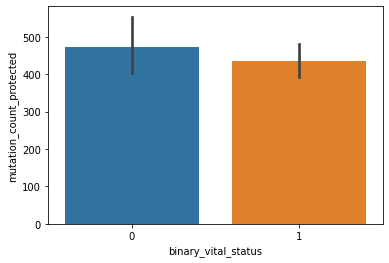

In [13]:
sns.barplot(data=rel_judith, x='binary_vital_status', y='mutation_count_protected')

In [ ]:
#gets rna seq corresponding to a mutation gene 
def get_rna_seq(row): 
  try: 
    return row[row['PATIENT_ID']]
  except:
    return np.NaN

idx_rna_df["rna_seq_count"] = idx_rna_df.apply(get_rna_seq, axis=1)
idx_rna_df.head()

,rank,gene,description,N,n,npat,nsite,nsil,n1,n2,n3,n4,n5,n6,p_classic,p_ns_s,p_clust,p_cons,p_joint,p,q,Hugo_Symbol,Entrez_Gene_Id,Consequence,dbSNP_RS,Tumor_Sample_Barcode,Matched_Norm_Sample_Barcode,t_ref_count,t_alt_count,TCGA-4P-AA8J,TCGA-BA-4074,TCGA-BA-4075,TCGA-BA-4076,TCGA-BA-4077,TCGA-BA-4078,TCGA-BA-5149,TCGA-BA-5151,TCGA-BA-5152,TCGA-BA-5153,TCGA-BA-5555,...,TCGA-RS-A6TO,TCGA-RS-A6TP,TCGA-T2-A6WX,TCGA-T2-A6WZ,TCGA-T2-A6X0,TCGA-T2-A6X2,TCGA-T3-A92M,TCGA-T3-A92N,TCGA-TN-A7HI,TCGA-TN-A7HJ,TCGA-TN-A7HL,TCGA-UF-A718,TCGA-UF-A719,TCGA-UF-A71A,TCGA-UF-A71A.1,TCGA-UF-A71B,TCGA-UF-A71D,TCGA-UF-A71E,TCGA-UF-A7J9,TCGA-UF-A7JA,TCGA-UF-A7JC,TCGA-UF-A7JD,TCGA-UF-A7JF,TCGA-UF-A7JH,TCGA-UF-A7JJ,TCGA-UF-A7JK,TCGA-UF-A7JO,TCGA-UF-A7JS,TCGA-UF-A7JT,TCGA-UF-A7JV,TCGA-UP-A6WW,TCGA-WA-A7GZ,TCGA-WA-A7GZ.1,TCGA-WA-A7H4,entrez_gene_id_rna,PATIENT_ID,binary_vital_status,survival_days,age_at_diagnosis,rna_seq_count
0,1,NOTCH1,"Notch homolog 1, translocation-associated (Dro...",3188473,99,90,94,9,16,17,15,10,40,1,2.89e-15,2.65e-07,0.000236,0.145000,0.000361,0,0,NOTCH1,4851.0,missense_variant,NaN,TCGA-CV-5971-01,TCGA-CV-5971-11,16,3,5.622748,3.595554,4.162675,6.099588,7.563808,7.861352,4.772255,5.711752,4.818996,7.313297,7.235346,...,5.889346,8.965302,8.357905,6.105585,8.599885,6.647202,7.609394,7.376918,7.754142,6.060794,6.105787,7.584595,5.959429,6.583362,7.056347,6.548121,6.342563,6.887947,7.145632,7.297934,6.704808,5.837921,5.655028,6.073819,5.226889,5.326006,5.263589,5.588150,7.049744,8.127907,7.517497,6.080921,7.374444,7.391309,4851.0,TCGA-CV-5971,0,702.415,61,6.386464
1,25,MAPK1,mitogen-activated protein kinase 1,506892,9,9,2,0,7,1,0,0,1,0,2.91e-05,0.0486,0.000040,0.050100,0.000053,3.28e-08,2.38e-05,MAPK1,5594.0,"missense_variant,splice_region_variant",NaN,TCGA-CV-5971-01,TCGA-CV-5971-11,45,3,5.945483,7.587073,6.710241,7.911314,7.370771,7.775906,6.956584,7.685722,7.526023,7.657882,8.278670,...,6.745471,7.551243,6.828761,5.646759,7.258306,7.012428,6.742922,6.650908,5.617002,6.990616,6.238474,6.873516,7.699001,7.552698,7.739211,7.976558,7.616787,7.008806,8.195469,7.090762,7.526544,7.376266,6.235433,6.623088,6.846503,7.115847,7.091882,4.322617,6.382148,6.868046,6.632504,7.002026,7.215368,7.217998,5594.0,TCGA-CV-5971,0,702.415,61,7.092647
2,276,PCDHGA3,"protocadherin gamma subfamily A, 3",1468754,13,13,13,1,5,2,5,1,0,0,0.0447,0.0267,0.014600,0.864000,0.032400,0.0109,0.716,PCDHGA3,56112.0,missense_variant,NaN,TCGA-CV-5971-01,TCGA-CV-5971-11,136,14,-1.000774,-2.796391,-1.878707,-1.963830,-3.456997,-2.171344,-1.538095,-2.411758,-0.284929,-3.134054,-2.039042,...,1.518013,-3.149890,-3.098103,-5.691992,-3.073305,-2.339897,-1.445310,-3.726208,-5.611497,-0.987469,-4.560392,-1.982715,0.949140,-1.446965,-2.045129,-3.604701,-3.384779,-3.948603,-0.959645,-0.921618,-2.885795,-0.914967,-5.635185,-1.945663,-1.586895,-1.482865,-3.663933,-2.798934,-2.559053,-1.811322,-3.482186,-1.169254,0.861834,0.495861,56112.0,TCGA-CV-5971,0,702.415,61,0.489479
3,1,NOTCH1,"Notch homolog 1, translocation-associated (Dro...",3188473,99,90,94,9,16,17,15,10,40,1,2.89e-15,2.65e-07,0.000236,0.145000,0.000361,0,0,NOTCH1,4851.0,missense_variant,NaN,TCGA-CV-A468-01,TCGA-CV-A468-10,38,4,5.622748,3.595554,4.162675,6.099588,7.563808,7.861352,4.772255,5.711752,4.818996,7.313297,7.235346,...,5.889346,8.965302,8.357905,6.105585,8.599885,6.647202,7.609394,7.376918,7.754142,6.060794,6.105787,7.584595,5.959429,6.583362,7.056347,6.548121,6.342563,6.887947,7.145632,7.297934,6.704808,5.837921,5.655028,6.073819,5.226889,5.326006,5.263589,5.588150,7.049744,8.127907,7.517497,6.080921,7.374444,7.391309,4851.0,TCGA-CV-A468,1,464.820,42,6.370072
4,2,CASP8,"caspase 8, apoptosis-related cysteine peptidase",891984,60,54,48,1,3,8,8,8,31,2,3.44e-15,2.19e-06,0.576000,0.000017,0.000177,0,0,CASP8,841.0,missense_variant,NaN,TCGA-CV-A468-01,TCGA-CV-A468-10,82,6,4.361529,4.470276,4.345204,4.088644,5.144668,5.052907,4.638998,3.763170,4.319896,4.746040,4.783063,...,4.726765,4.519817,5.786479,2.284371,4.940454,5

In [ ]:
idx_rna_df.to_csv(personal_path+'messy_rna&mut_data_top_400.csv')

In [ ]:
col = list(relevant_basic_df.columns)
# ['PATIENT_ID','gene','age_at_diagnosis', 'binary_vital_status','Entrez_Gene_Id','Matched_Norm_Sample_Barcode', 'Tumor_Sample_Barcode','Consequence', ]
col.extend(['gene', 'rank', 'Entrez_Gene_Id','Matched_Norm_Sample_Barcode', 'Tumor_Sample_Barcode','Consequence', 'rna_seq_count'])
select_idx_df = idx_rna_df[col]
select_idx_df.head()

,PATIENT_ID,binary_vital_status,survival_days,age_at_diagnosis,Matched_Norm_Sample_Barcode,gene,rank,Entrez_Gene_Id,Matched_Norm_Sample_Barcode,Tumor_Sample_Barcode,Consequence,rna_seq_count
0,TCGA-CV-5971,0,702.415,61,TCGA-CV-5971-11,NOTCH1,1,4851.0,TCGA-CV-5971-11,TCGA-CV-5971-01,missense_variant,6.386464
1,TCGA-CV-5971,0,702.415,61,TCGA-CV-5971-11,MAPK1,25,5594.0,TCGA-CV-5971-11,TCGA-CV-5971-01,"missense_variant,splice_region_variant",7.092647
2,TCGA-CV-5971,0,702.415,61,TCGA-CV-5971-11,PCDHGA3,276,56112.0,TCGA-CV-5971-11,TCGA-CV-5971-01,missense_variant,0.489479
3,TCGA-CV-A468,1,464.820,42,TCGA-CV-A468-10,NOTCH1,1,4851.0,TCGA-CV-A468-10,TCGA-CV-A468-01,missense_variant,6.370072
4,TCGA-CV-A468,1,464.820,42,TCGA-CV-A468-10,CASP8,2,841.0,TCGA-CV-A468-10,TCGA-CV-A468-01,missense_variant,4.750592
